In [1]:
import pandas as pd

In [2]:
pd.read_csv('playtennis.csv')

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
tennis_data = pd.read_csv('playtennis.csv')

In [4]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)

In [6]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
tennis_data['Temperature'] = le.fit_transform(tennis_data['Temperature'])

In [11]:
tennis_data['Temperature'].value_counts()

2    6
1    4
0    4
Name: Temperature, dtype: int64

In [12]:
tennis_data['Humidity'] = le.fit_transform(tennis_data['Humidity'])
tennis_data['Wind'] = le.fit_transform(tennis_data['Wind'])

In [13]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,1,No
1,0,1,0,0,No
2,1,1,0,1,Yes
3,2,2,0,1,Yes
4,2,0,1,1,Yes
5,2,0,1,0,No
6,1,0,1,0,Yes
7,0,2,0,1,No
8,0,0,1,1,Yes
9,2,2,1,1,Yes


In [14]:
tennis_data['PlayTennis'] = le.fit_transform(tennis_data['PlayTennis'])

In [15]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,1,0
1,0,1,0,0,0
2,1,1,0,1,1
3,2,2,0,1,1
4,2,0,1,1,1
5,2,0,1,0,0
6,1,0,1,0,1
7,0,2,0,1,0
8,0,0,1,1,1
9,2,2,1,1,1


In [16]:
import numpy as np

In [17]:
x = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind'] ))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis'] ))

In [18]:
x

array([[0, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 1, 0, 1],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [2, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 2, 0, 1],
       [0, 0, 1, 1],
       [2, 2, 1, 1],
       [0, 2, 1, 0],
       [1, 2, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 0, 0]], dtype=int64)

In [19]:
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
feature = [
    'Outlook', 'Temperature', 'Humidity', 'Wind'
]

In [22]:
label = [
    'PlayTennis'
]

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(tennis_data[feature], tennis_data[label], test_size=0.2, shuffle=True, random_state=30)
# shuffle은 무작위로 분할(True), 순차적으로 분할(False)입니다. 시계열데이터의 경우 False를 적용합니다.abs
# random_State는 난수개념으로  섞는 개념입니다.

In [24]:
x_train.shape, y_train.shape

((11, 4), (11, 1))

In [25]:
x_valid.shape, y_valid.shape

((3, 4), (3, 1))

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train, y_train)

In [31]:
dt_prediction = dt_clf.predict(x_valid)

In [32]:
dt_prediction

array([0, 1, 0])

In [33]:
x_valid

,Outlook,Temperature,Humidity,Wind
0,0,1,0,1
9,2,2,1,1
11,1,2,0,0


In [34]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy = accuracy_score(y_valid, dt_prediction)
print(accuracy)

0.6666666666666666


In [38]:
from sklearn.tree import export_graphviz
from subprocess import call

In [39]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

In [40]:
from IPython.core.display import Image

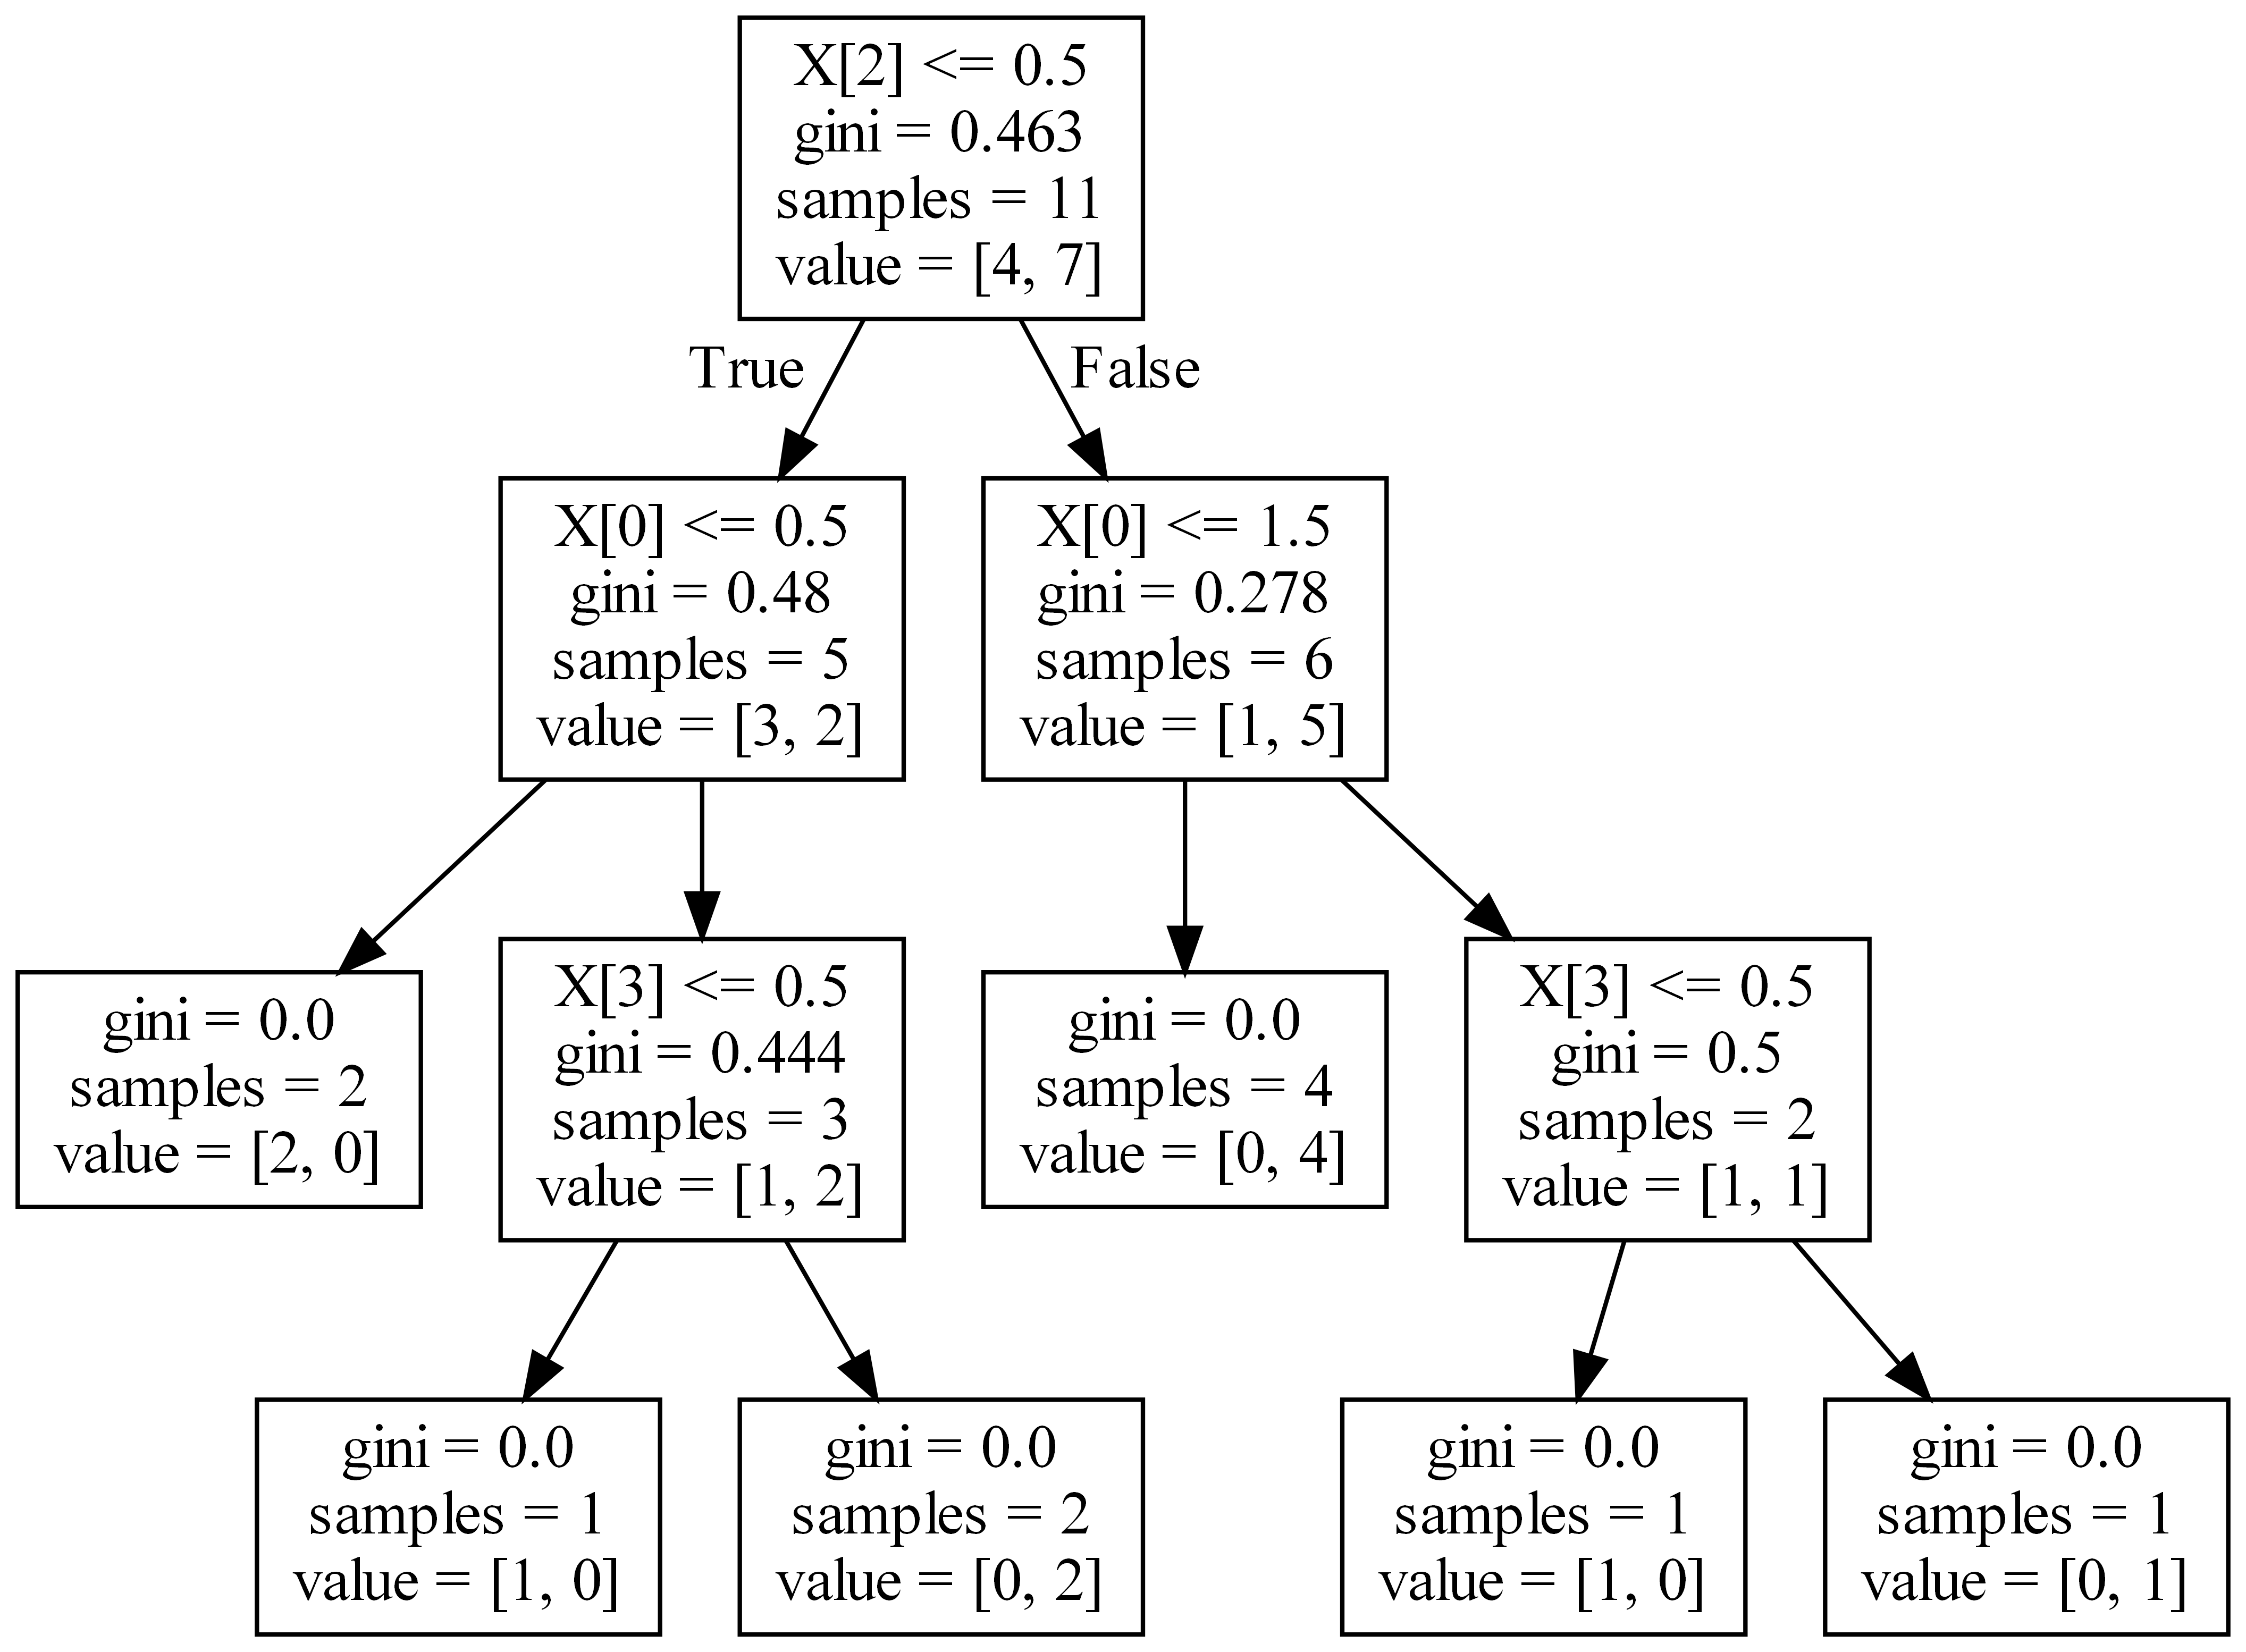

In [41]:
graph_tree(dt_clf)